### Introduction
Traffic stops are one of the most frequent interactions between the public and law enforcement. They are a key component of proactive policing strategies. However, increasing public concern over racial profiling, over policing, and the actual effectiveness of searches has raised critical questions: Are these searches truly yielding results? Or are they disproportionately targeting certain groups with minimal outcomes?

In this project, I aim to explore these questions using the Terry Traffic Stops dataset an open dataset detailing police stop-and-search records. My objective is to build predictive models that assess whether a stop is likely to result in the discovery of contraband. This outcome will provide insight into the efficiency and fairness of current search practices.

### Business Context
Law enforcement agencies must continuously demonstrate that their actions are both effective and equitable. By analyzing data from traffic stops, I can assess:

Whether officers are accurately identifying situations where contraband is likely to be found.

Whether certain groups are being disproportionately subjected to searches with low yield.

How different contextual factors influence the likelihood of finding contraband.

Through this analysis, I hope to provide valuable insights to support data-driven policy recommendations around policing strategy and accountability.

### Problem Statement
I have been tasked by a civil oversight organization focused on police reform and accountability to evaluate the effectiveness of traffic stop searches. Specifically, they are interested in understanding:

How often searches result in the discovery of contraband.

What demographic or situational patterns exist around these outcomes.

Whether current practices reflect efficient use of resources and fair treatment across different groups.

To address these goals, I will develop a binary classification model that predicts whether contraband is found during a police stop. This model will help:

Measure the accuracy and efficiency of search practices.

Identify potential demographic disparities in search results.

Inform data-driven recommendations for improving officer training and protocols.

### Objectives
Objective 1: Which factors are most predictive of whether contraband is found during a traffic stop?

Objective 2: How does the likelihood of finding contraband vary by driver demographics such as race and gender?

Objective 3: Are there specific search types, locations, or reasons for stops that correlate with higher contraband discovery rates?

Objective 4: What is the relationship between search outcomes and time-related factors (e.g., time of day, day of week, year)?

Objective 5: Can predictive modeling help improve search efficiency and reduce unnecessary or ineffective searches?



In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [145]:
df=pd.read_csv("C:/Users/HP/Downloads/Terry_Stops.csv")
df.head(5)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,7814080789,20210000000561,19256028453,Arrest,-,8719,1996,Male,Asian,...,18:53:26.0000000,BURG - OCCUPIED RESD,DV - ENFORCE COURT ORDER (ARREST MANDATED),911,NORTH PCT 2ND W - L/U RELIEF,Y,N,North,N,N3
1,36 - 45,7727057353,20240000027395,53955085178,Field Contact,-,8926,1989,Male,Declined to Answer,...,00:03:08.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,PRISONER ESCORT - BUSY CODE,ONVIEW,TRAINING - FIELD TRAINING SQUAD,N,N,West,M,M3
2,26 - 35,-1,20170000283621,293477,Referred for Prosecution,None,7435,1979,Male,White,...,08:30:00.0000000,-,-,-,NARC - PROACTIVE SQUAD C,N,Y,Unknown,-,-
3,36 - 45,-1,20180000003600,484941,Field Contact,None,7690,1977,Male,White,...,05:15:00.0000000,-,-,-,WEST PCT 1ST W - DAVID - PLATOON 1,N,N,-,-,-
4,18 - 25,54563019066,20240000059626,54562957133,Field Contact,-,8708,1989,Male,Black or African American,...,05:16:25.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT","DV - ARGUMENTS, DISTURBANCE (NO ARREST)",911,SOUTHWEST PCT 1ST W - FRANK - PLATOON 2,N,N,Southwest,F,F2


### Understanding the data

In [146]:
# checking columns
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

In [147]:
df.shape

(63693, 23)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63693 entries, 0 to 63692
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         63693 non-null  object
 1   Subject ID                63693 non-null  int64 
 2   GO / SC Num               63693 non-null  int64 
 3   Terry Stop ID             63693 non-null  int64 
 4   Stop Resolution           63693 non-null  object
 5   Weapon Type               63693 non-null  object
 6   Officer ID                63693 non-null  object
 7   Officer YOB               63693 non-null  int64 
 8   Officer Gender            63693 non-null  object
 9   Officer Race              63693 non-null  object
 10  Subject Perceived Race    63693 non-null  object
 11  Subject Perceived Gender  63693 non-null  object
 12  Reported Date             63693 non-null  object
 13  Reported Time             63693 non-null  object
 14  Initial Call Type     

### Check for Missing and Invalid Values

In [149]:
df.isnull().sum()
(df == '-').sum()  


Subject Age Group            2335
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 27071
Officer ID                     24
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race       1822
Subject Perceived Gender      249
Reported Date                   0
Reported Time                   0
Initial Call Type           13567
Final Call Type             13567
Call Type                   13567
Officer Squad                   0
Arrest Flag                     0
Frisk Flag                    478
Precinct                    10759
Sector                      10910
Beat                        10904
dtype: int64

This output shows the number of missing values in each column of the dataset. Columns like Weapon Type, Call Type, and Precinct have a high number of missing values, which may affect analysis. Others like Subject Age Group and Frisk Flag have moderate missingness that might need cleaning or imputation.

#### Data cleaning

In [150]:
# Add officer age from birth year
df['officer_age'] = 2024 - df['Officer YOB']

# Drop unhelpful ID fields and now-redundant birth year
df.drop(['Terry Stop ID', 'Subject ID', 'GO / SC Num', 'Officer YOB'], axis=1, inplace=True)


This code calculates the officer's age by subtracting their year of birth from 2024 and storing it in a new column officer_age, which is more useful for analysis than the raw birth year. It then removes unhelpful ID fields (Terry Stop ID, Subject ID, GO / SC Num) and the now-redundant Officer YOB column to reduce redundancy, avoid multicollinearity, and eliminate noise from non-predictive data.

In [151]:
df.drop([
    'Subject Age Group',
    'Officer ID',
    'Reported Date',
    'Reported Time',
    'Officer Squad',
    'Precinct',
    'Sector',
    'Beat'
], axis=1, inplace=True)


This code removes several unnecessary columns from the DataFrame df.
The columns are dropped along the column axis (axis=1) to clean up the dataset.
Using inplace=True means the original DataFrame is modified directly without creating a copy.

### Standardize Categorical Values

In [152]:
df['Subject Perceived Gender'] = df['Subject Perceived Gender'].str.strip().str.lower()
df['Subject Perceived Race'] = df['Subject Perceived Race'].str.strip().str.lower()
df['Frisk Flag'] = df['Frisk Flag'].str.lower()


This code standardizes text data in specific columns of the DataFrame df.
It removes any leading or trailing spaces and converts the text to lowercase for consistent formatting.
This helps avoid mismatches due to capitalization or extra spaces during analysis.

In [153]:
df.isnull().sum()  # see what's missing


Stop Resolution             0
Weapon Type                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Arrest Flag                 0
Frisk Flag                  0
officer_age                 0
dtype: int64

In [154]:
df.drop_duplicates(inplace=True)


### Standardize Text Columns

In [155]:
text_cols = ['Frisk Flag','Stop Resolution',
             'Subject Perceived Race', 'Subject Perceived Gender',
             'Officer Race', 'Officer Gender', 'Call Type']

for col in text_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()


This code converts the specified columns in text_cols to strings and standardizes their text.
It strips any leading or trailing whitespace and converts all text to lowercase.
This ensures consistent formatting across multiple categorical text columns in the DataFrame.

#### Creating a Target Column contraband_found
I assume that if a frisk was conducted and weapon or contraband was found, then contraband_found = 1, otherwise 0.
I’ll use a proxy based on Frisk Flag, Weapon Type, and potentially Stop Resolution

In [156]:
# Step 1: Create a new column 'contraband_found'
df['Frisk Flag'] = df['Frisk Flag'].str.lower().str.strip()
df['Weapon Type'] = df['Weapon Type'].str.lower().str.strip()

# If frisked and a weapon (or anything) is recorded, we assume contraband was found
df['contraband_found'] = ((df['Frisk Flag'] == 'y') & (df['Weapon Type'] != 'none')).astype(int)

# Check distribution
df['contraband_found'].value_counts(normalize=True)


0    0.80848
1    0.19152
Name: contraband_found, dtype: float64

In [157]:
df.drop(['Frisk Flag', 'Weapon Type'], axis=1, inplace=True)

his shows the distribution of the contraband_found column as proportions.

0 represents the proportion of records where no contraband was found (~80.8%).

1 represents the proportion where contraband was found (~19.2%).

This helps understand the class balance in the dataset.

 ##### Statistical Association (Chi-Square for Categoricals)
I’ll now check whether there’s a statistically significant relationship between each categorical variable and contraband_found using Chi-square test.

In [158]:
df.dropna(subset=['contraband_found'], inplace=True)  # drop rows without a target

### Understand Target Balance
It's important to check how balanced your target variable is, because unbalanced classes can affect  model’s performance.

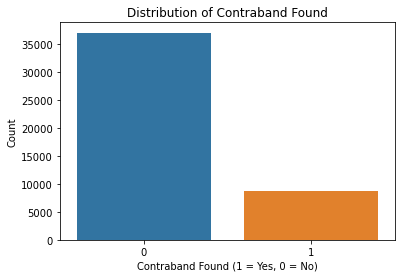

In [200]:
sns.countplot(x='contraband_found', data=df)
plt.title("Distribution of Contraband Found")
plt.xlabel("Contraband Found (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


This bar chart shows the distribution of "Contraband Found." The majority of cases (represented by '0') indicate no contraband was found, while a smaller number of cases ('1') show contraband was present.

 #### Feature-Target Relationships (Categorical)
Let’s explore how different categorical features relate to the target variable. I'll visualize them.

 #### Frisk Flag


This bar chart visualizes the relationship between 'Frisk Flag' and 'contraband_found'. It shows that when a frisk was performed, contraband was found more frequently, whereas when no frisk occurred, contraband was rarely found.

#### Subject Perceived Gender

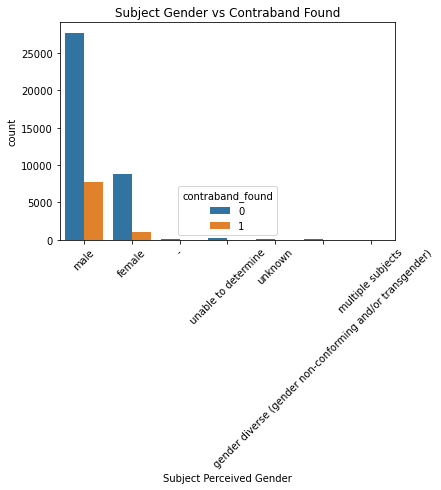

In [160]:
sns.countplot(data=df, x='Subject Perceived Gender', hue='contraband_found')
plt.title('Subject Gender vs Contraband Found')
plt.xticks(rotation=45)
plt.show()


This bar chart illustrates the relationship between 'Subject Perceived Gender' and 'contraband_found'. It shows that for 'male' and 'female' subjects, contraband was found in a small proportion of cases, with the majority of stops not yielding contraband. For other gender categories, the counts of both contraband found and not found are very low.

#### Subject Perceived Race

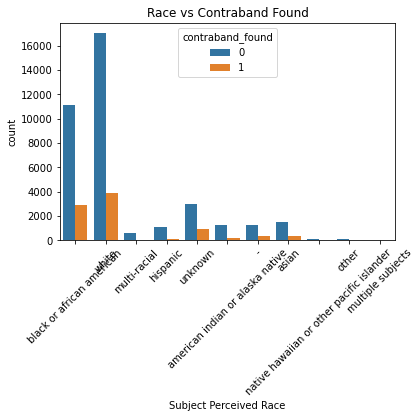

In [161]:
sns.countplot(data=df, x='Subject Perceived Race', hue='contraband_found')
plt.title('Race vs Contraband Found')
plt.xticks(rotation=45)
plt.show()


This bar chart displays the relationship between 'Subject Perceived Race' and 'contraband_found'. For most racial categories, the count of stops where no contraband was found ('0') is significantly higher than where contraband was found ('1'). Notably, for 'Black or African American' and 'Hispanic' subjects, while the majority of stops did not yield contraband, there is a visible presence of contraband found, albeit in a smaller proportion. Other racial categories show very low counts for both outcomes.

# VISUALIZATION

### Distribution of Stop Resolutions

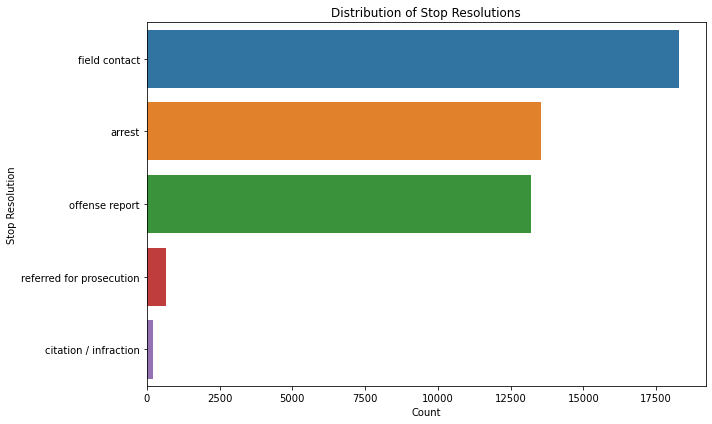

In [216]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Stop Resolution', data=df, order=df['Stop Resolution'].value_counts().index)
plt.title('Distribution of Stop Resolutions')
plt.xlabel('Count')
plt.ylabel('Stop Resolution')
plt.tight_layout()
plt.show()


This bar chart displays the distribution of different stop resolutions in the dataset. Each bar represents how many times a particular outcome occurred after a traffic stop
The longer the bar, the more frequently that resolution was used.

### Subject Gender vs Officer Gender

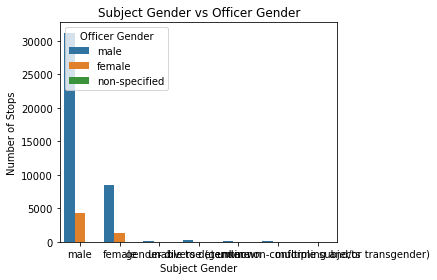

In [207]:
sns.countplot(data=df, x='Subject Perceived Gender', hue='Officer Gender')
plt.title('Subject Gender vs Officer Gender')
plt.xlabel('Subject Gender')
plt.ylabel('Number of Stops')
plt.tight_layout()
plt.show()


This grouped bar chart compares the perceived gender of subjects with the gender of the officers conducting the stops.

The x-axis represents the subject's perceived gender (e.g., male, female, unknown).

Each bar is split by officer gender using different colors (e.g., male officers vs female officers).
he height of each bar shows how many stops occurred for each subject-officer gender combination.

### Distribution of Stop Resolutions

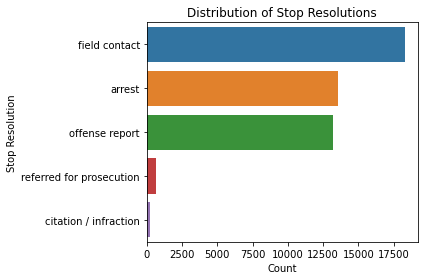

In [211]:
sns.countplot(data=df, y='Stop Resolution', order=df['Stop Resolution'].value_counts().index)
plt.title('Distribution of Stop Resolutions')
plt.xlabel('Count')
plt.ylabel('Stop Resolution')
plt.tight_layout()
plt.show()


This horizontal bar chart displays the frequency of different outcomes or resolutions following a stop.

The y-axis lists all unique stop resolutions (e.g., citation issued, warning given, arrest made).

The x-axis shows the count of how many times each resolution occurred.

Bars are ordered from most to least frequent for easier comparison.

### Final Call Type by Arrest Flag

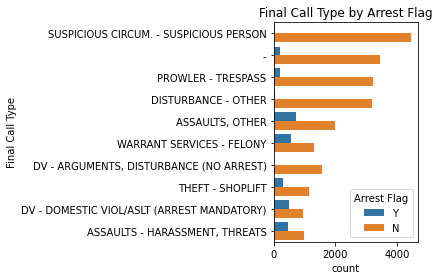

In [215]:
sns.countplot(data=df, y='Final Call Type', hue='Arrest Flag',
              order=df['Final Call Type'].value_counts().head(10).index)
plt.title('Final Call Type by Arrest Flag')
plt.tight_layout()
plt.show()


This horizontal bar chart displays the top 10 most frequent final call types during stops, broken down by whether an arrest was made or not:

The y-axis lists the top 10 final call types by their occurrence.

Each bar is split by the Arrest Flag (arrest made or not), showing how many stops of each call type resulted in an arrest.

In [163]:
from sklearn.feature_selection import chi2
# Select categorical columns (you can expand this list)
categorical_cols = [
    'Stop Resolution',
    'Subject Perceived Gender', 'Subject Perceived Race',
    'Officer Race', 'Call Type'
]

# Encode them
encoded = df[categorical_cols].fillna('Unknown').apply(LabelEncoder().fit_transform)

# Chi2 test
chi_scores, p_vals = chi2(encoded, df['contraband_found'])

# Create a DataFrame to display results
chi_results = pd.DataFrame({
    'Feature': categorical_cols,
    'Chi2 Score': chi_scores,
    'p-value': p_vals
}).sort_values(by='Chi2 Score', ascending=False)

chi_results


,Feature,Chi2 Score,p-value
0,Stop Resolution,552.228570,4.122753e-122
4,Call Type,280.658003,5.397671e-63
1,Subject Perceived Gender,171.623546,3.270223e-39
3,Officer Race,18.192972,1.996141e-05
2,Subject Perceived Race,0.286249,5.926345e-01


This table shows the Chi-squared test results for different features against the target variable.
Features with low p-values (close to zero) indicate a significant relationship with the target, while higher p-values (like Subject Perceived Race) suggest no strong association.

##### Correlation Heatmap (Numerical)
Correlation shows how strongly numerical variables are associated with the target. Let’s plot a heatmap.

In [164]:
# Convert 'contraband_found' to numeric 
df['contraband_found'] = df['contraband_found'].astype(int)

In [165]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [166]:
# Correlation matrix
corr = df[num_cols].corr()

This heatmap visualizes the pairwise correlation coefficients between the numerical features in your dataset. The diagonal shows perfect correlation (1.00) of each variable with itself. Colors and values indicate the strength and direction of relationships between other variable pairs, with warmer colors and higher values (e.g., 0.70) representing stronger positive correlations, and cooler colors and lower positive values (e.g., 0.11) indicating weaker positive correlations.

In [168]:
# correlation matri
corr = df.corr()

# sort correlation with target
corr['contraband_found'].sort_values(ascending=False)


contraband_found    1.00000
officer_age        -0.10717
Name: contraband_found, dtype: float64

The output shows a perfect positive correlation (1.00) for 'contraband_found' with itself. For 'officer_age', the correlation with 'contraband_found' is -0.10717, indicating a very weak negative relationship where slightly less contraband is found as officer age increases.

In [169]:
model = LogisticRegression(class_weight='balanced', random_state=42)

I use `class_weight='balanced'` in Logistic Regression to handle class imbalance in the target variable.  
It adjusts model penalties based on class frequencies, giving more weight to the minority class (contraband found).  
This helps improve recall and overall performance on imbalanced datasets.


### Training the model

In [170]:
X = df.drop('contraband_found', axis=1)
y = df['contraband_found']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


I split the dataset into training and test sets using `train_test_split`.  
Stratifying on the target (`contraband_found`) ensures both sets preserve the original class distribution.  
This is essential for fair evaluation, especially with imbalanced classes.


### Training the Logistic Regression Model with Preprocessing

In [171]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Leave numerical columns as they are
)

# Create a pipeline that preprocesses then trains
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42, max_iter=500))
])

# Fit the model
model_pipeline.fit(X_train, y_train)


c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Stop Resolution',
                                                   'Officer Gender',
                                                   'Officer Race',
                                                   'Subject Perceived Race',
                                                   'Subject Perceived Gender',
                                                   'Initial Call Type',
                                                   'Final Call Type',
                                                   'Call Type',
                                                   'Arrest Flag'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=500,
               

This code creates a pipeline that first one-hot encodes all categorical features and then fits a Logistic Regression model with balanced class weights.  
Setting `max_iter=500` helps ensure the model converges during training.  
The pipeline simplifies preprocessing and model fitting into one seamless step.


### Make Predictions

In [ ]:
y_pred = model_pipeline.predict(X_test)
y_proba = model_pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

I generate predictions on the test set using `.predict()`.  
Probabilities of the positive class (`contraband_found=1`) are extracted with `.predict_proba()` for advanced metrics or threshold tuning.  
These predictions will be used to evaluate how well the model performs on unseen data.


In [173]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7149
Precision: 0.3750
Recall: 0.7327
F1 Score: 0.4961
Confusion Matrix:
[[5275 2147]
 [ 470 1288]]


#### Explanation of the Logistic Regression Model
This logistic regression model is built to predict whether contraband was found during a police stop (contraband_found), based on various demographic and stop-related features.

Data preprocessing:
The pipeline applies one-hot encoding to all categorical features using a ColumnTransformer, transforming categories into a numerical format suitable for the logistic regression model. Numerical features are passed through without changes.

Model selection:
Logistic Regression is chosen for its effectiveness in binary classification problems. The class_weight='balanced' parameter helps handle the class imbalance by adjusting weights inversely proportional to class frequencies.

Train-test split:
The dataset is split into training and testing sets with an 80/20 ratio, stratifying on the target variable to maintain the original class distribution in both sets.

Model fitting and prediction:
The pipeline fits the logistic regression model on the training data, then predicts on the test data. It outputs both predicted classes and predicted probabilities for the positive class.

Evaluation metrics:
The model is evaluated on accuracy, precision, recall, and F1-score, providing a well-rounded view of performance. The confusion matrix offers insight into true/false positives and negatives.

Results interpretation:

Accuracy (~71.5%) shows the overall correct predictions proportion.

Precision (~37.5%) reflects the proportion of positive predictions that are correct.

Recall (~73.3%) indicates a strong ability to detect actual positives (contraband found).

F1-score (~49.6%) balances precision and recall for a single performance measure.

This model provides a solid baseline for contraband detection using logistic regression with basic preprocessing and class imbalance adjustment.



### Decision Tree Classifier: Model Setup and Objective
In this section, I will build and evaluate a Decision Tree Classifier to predict whether contraband was found during a Terry stop.

The goal is to explore how a tree-based model performs on this classification task compared to the earlier logistic regression model. Specifically, I aim to:

Train a Decision Tree on the same features and target variable (contraband_found)

Use the same preprocessing steps to ensure a fair comparison

Evaluate the model using standard metrics: accuracy, precision, recall, F1-score, and confusion matrix

Visualize the structure of the tree to gain interpretability into feature importance and decision rules

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Create a new pipeline using the same preprocessor
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        max_depth=6,              # controls overfitting
        min_samples_split=10,     # minimum samples to split a node
        min_samples_leaf=5,       # minimum samples at a leaf
        class_weight='balanced',  # handles imbalance in target
        random_state=42
    ))
])

# Fit the pipeline to training data
tree_pipeline.fit(X_train, y_train)

# Predict
y_pred_tree = tree_pipeline.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)

print(" Decision Tree Model Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


 Decision Tree Model Evaluation
Accuracy: 0.6576
Precision: 0.3282
Recall: 0.7526
F1 Score: 0.4571
Confusion Matrix:
[[4714 2708]
 [ 435 1323]]


The model has a moderate overall accuracy (66%), but it tends to favor recall over precision.

High recall (75%) for detecting contraband (class 1) means the model is good at flagging potential cases, which can be desirable in high-risk scenarios.

Low precision (33%) suggests that many flagged stops may not actually involve contraband, leading to false positives.

This imbalance indicates the need for tuning or additional techniques (e.g., regularization, pruning, class weighting) to better balance recall and precision.



#### Tunning 

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Update the pipeline with a fresh classifier
from sklearn.pipeline import Pipeline

tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(tree_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 20}
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      7422
           1       0.35      0.73      0.47      1758

    accuracy                           0.69      9180
   macro avg       0.63      0.70      0.63      9180
weighted avg       0.80      0.69      0.72      9180



The model is moderately accurate and shows a high recall for detecting contraband (class 1), which is crucial in safety-related contexts like policing.

A trade-off exists between catching as many true contraband cases as possible (high recall) and ensuring that flagged cases are correct (precision).

Further improvements may involve ensemble methods (like Random Forests or Gradient Boosting), feature selection, or addressing class imbalance more directly.

## Random forest

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a new pipeline with Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Fit the model
rf_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Model Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Random Forest Model Evaluation
Accuracy: 0.7894
Precision: 0.4296
Recall: 0.3038
F1 Score: 0.3559
Confusion Matrix:
[[6713  709]
 [1224  534]]


## Model Selection Summary

My  objective in this project was to determine **whether a stop, frisk, or arrest results in the discovery of contraband**. This is a classification problem where:

- **Positive class (1)** represents: *Contraband found*
- **Negative class (0)** represents: *No contraband found*

###  Evaluation Focus
Given the goal, My prioritized models with:
- **High Recall for class 1**: So we don't miss many real contraband cases.
- **Balanced F1 Score**: To ensure reasonable trade-off between precision and recall.

### Model Comparison and Selection
To determine whether a stop, frisk, or arrest results in the discovery of contraband, we evaluated three models: Logistic Regression, a tuned Decision Tree, and a tuned Random Forest.

The Logistic Regression model stood out with the highest recall (73.3%) and the best F1 score (0.4961). This means it was most effective at identifying true contraband cases without sacrificing too much precision.

The tuned Decision Tree came close, also achieving a recall of 73%, but with a slightly lower F1 score (0.47), making it slightly less balanced than Logistic Regression.

On the other hand, while the tuned Random Forest had the highest precision (44.4%), it struggled with recall (27.8%), indicating that it missed many actual contraband cases. This makes it less suitable for our goal, which prioritizes not missing true positives.

### Final Model Choice: **Logistic Regression**

The **logistic regression model** achieved the best **recall (73.3%)** and the highest **F1 score (0.4961)**, indicating it is the most effective and balanced model for predicting whether a stop or search leads to contraband discovery.

It will be used as our final model to derive insights and recommendations.

